In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Small Exploratory Analisys

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df_object = df[[col for col in df.columns if df[col].dtype != np.float64]]
df_object.drop(columns=['id'], inplace=True)
df_object

/tmp/ipykernel_36/1450419678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object.drop(columns=['id'], inplace=True)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,Male,0,1,Yes,Private,Rural,never smoked,1
3,Female,0,0,Yes,Private,Urban,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,1,0,Yes,Private,Urban,never smoked,0
5106,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,Male,0,0,Yes,Private,Rural,formerly smoked,0


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/opt/conda/lib/pyth

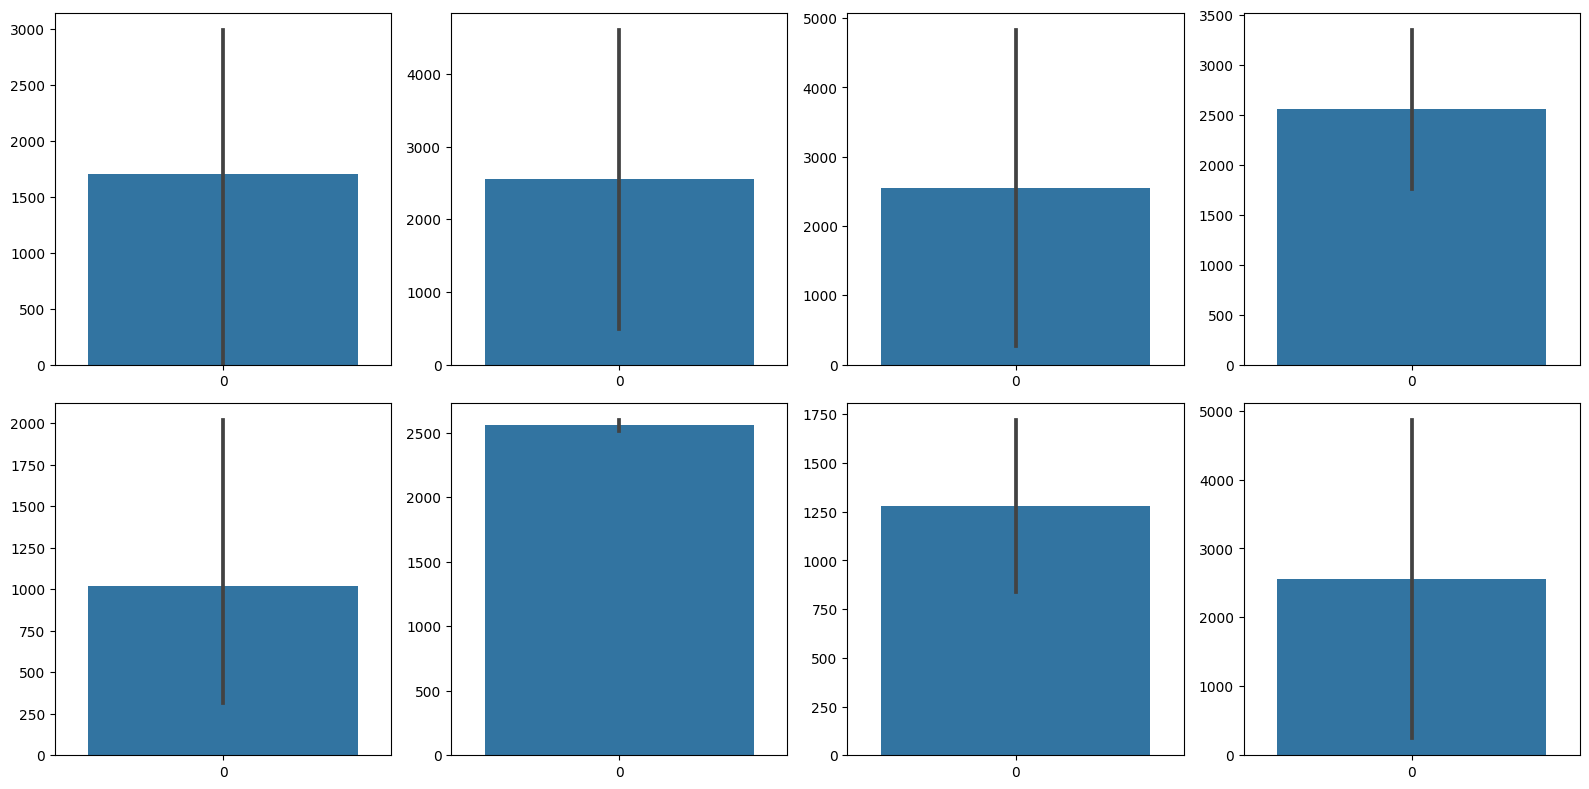

In [5]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

col: int = 0
for i in range(2):
  for j in range(4):
    sns.barplot(data=df_object.iloc[:, col].value_counts(), ax=axes[i, j])
    col += 1

plt.tight_layout()
plt.show()

Very unbalanced for positive diagnostics

In [6]:
df_float = df[[col for col in df.columns if df[col].dtype == np.float64]]
df_float

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


<Axes: >

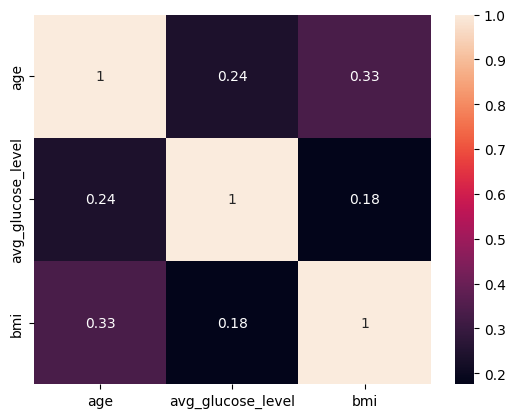

In [7]:
correlation = df_float.corr()
sns.heatmap(correlation, annot=True)

No impressive correlation

## Preprocessing for Machine Learning

In [8]:
df_ml = df.drop(columns=['id'],)
df_ml

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
# Binary objects variables
df_ml["Residence_type"] = (df_ml["Residence_type"] == "Urban").astype(int)
df_ml["ever_married"] = (df_ml["ever_married"] == "Yes").astype(int)
df_ml["gender"] = (df_ml["gender"] == "Male").astype(int)

In [11]:
# Hot encoding
df_ml = pd.get_dummies(df_ml, columns=["work_type", "smoking_status"], dtype=int)
df_ml.dropna(axis=0, inplace=True)

In [12]:
# Applying logarithm to rescale the values
df_ml["bmi"] = np.log2(df_ml["bmi"])
df_ml["avg_glucose_level"] = np.log2(df_ml["avg_glucose_level"])

In [13]:
# Filling the missing values with the median
median = df_ml["bmi"].median()
df_ml["bmi"] = df_ml["bmi"].fillna(median)

In [14]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   ever_married                    4909 non-null   int64  
 5   Residence_type                  4909 non-null   int64  
 6   avg_glucose_level               4909 non-null   float64
 7   bmi                             4909 non-null   float64
 8   stroke                          4909 non-null   int64  
 9   work_type_Govt_job              4909 non-null   int64  
 10  work_type_Never_worked          4909 non-null   int64  
 11  work_type_Private               4909 non-null   int64  
 12  work_type_Self-employed         4909 no

In [15]:
df_ml

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,0,0,7.837249,5.193772,1,0,0,1,0,0,0,1,0,0
2,0,80.0,0,1,0,0,6.726831,5.022368,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,0,0,7.419792,5.104337,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,0,0,7.443938,4.584963,1,0,0,0,1,0,0,0,1,0
5,0,81.0,0,0,0,0,7.540787,4.857981,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,0,6.687621,4.217231,0,0,0,0,0,1,1,0,0,0
5106,0,81.0,0,0,0,0,6.968091,5.321928,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,0,0,6.374866,4.935460,0,0,0,0,1,0,0,0,1,0
5108,0,51.0,0,0,0,0,7.377558,4.678072,0,0,0,1,0,0,0,1,0,0


## Data spliting and Undersampling

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [17]:
X = df_ml[[col for col in df_ml.columns if col != 'stoke']]
y = df_ml['stroke']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [19]:
y_train.value_counts(), y_test.value_counts()

(stroke
 0    3757
 1     170
 Name: count, dtype: int64,
 stroke
 0    943
 1     39
 Name: count, dtype: int64)

In [20]:
rus = RandomUnderSampler(random_state=32)
x_train_rus, y_train_ru = rus.fit_resample(x_train, y_train)

In [21]:
y_train_ru.value_counts()

stroke
0    170
1    170
Name: count, dtype: int64

Now the training data is balanced

## Models and Metrics

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [23]:
def test_models(models: dict, x_train, y_train, x_test, y_test) -> pd.DataFrame:
  """
  This functions iterates in the dict of models applying them to the specified data and returns the following metrics as a pandas datafarme and also plotting the confusion matrix for each model
  """
  results = {
    "Classifier": list(),
    "Accuracy": list(),
    "Precision": list(),
    "Recall": list(),
    "F1 Score": list(),
  }
  _, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,5))
  axes_row = (0, 0, 0, 1, 1, 1)
  axes_col = (0, 1, 2, 0, 1, 2)

  for (name, clf), row, col in zip(models.items(), axes_row, axes_col):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
      
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) # Pesquisar
    recall = recall_score(y_test, y_pred) # Pesquisar
    f1 = f1_score(y_test, y_pred) # Pesquisar

    results["Classifier"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    
    cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[row, col])

    axes[row, col].set_title(name)
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('True')

  plt.tight_layout()
  plt.show()
  
  results_df = pd.DataFrame(columns=results.keys(), data=results)

  return results_df

In [24]:
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Support Vector Machine": SVC(kernel='poly', degree=2, class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(solver='liblinear', class_weight='balanced'),
    "Multlayer Perceptron": MLPClassifier(hidden_layer_sizes=(16, 32, 16), activation='relu', learning_rate='adaptive', learning_rate_init=0.01, )
}

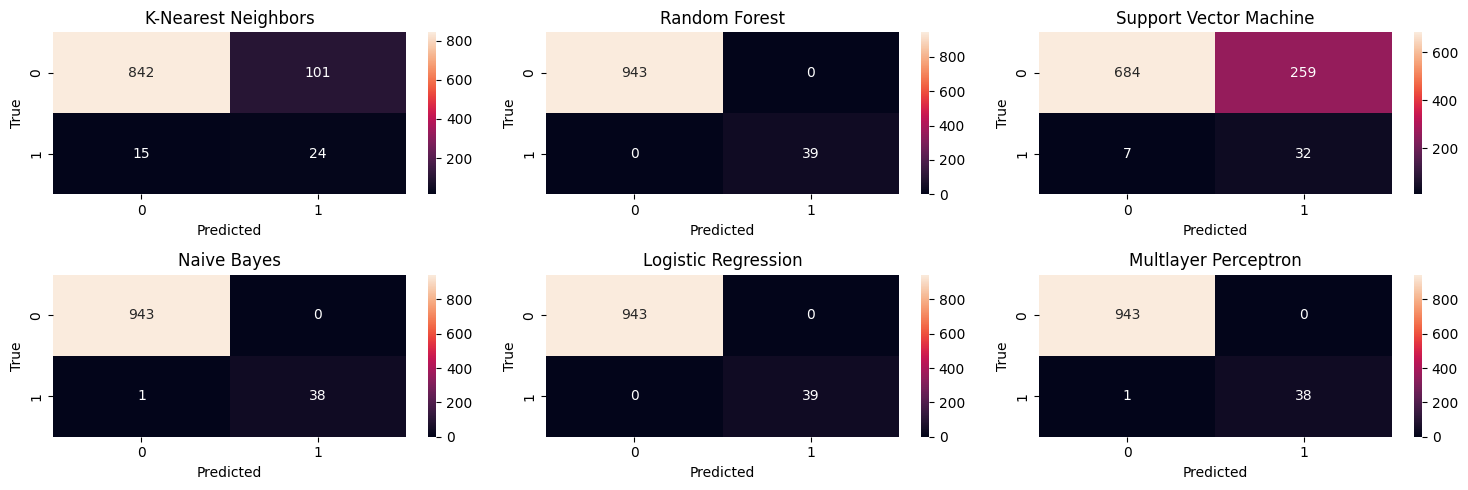

In [25]:
df_results = test_models(classifiers, x_train_rus, y_train_ru, x_test, y_test)

In [26]:
df_results

,Classifier,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,0.881874,0.192000,0.615385,0.292683
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Support Vector Machine,0.729124,0.109966,0.820513,0.193939
3,Naive Bayes,0.998982,1.000000,0.974359,0.987013
4,Logistic Regression,1.000000,1.000000,1.000000,1.000000
5,Multlayer Perceptron,0.998982,1.000000,0.974359,0.987013


Quite good results for some algorithms